In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output

%matplotlib inline

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 May 30 07:31 kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer

 98% 15.0M/15.3M [00:00<00:00, 26.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 16.7MB/s]


In [4]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**Exploration of dataset**

*Training dataset*

In [7]:
#loading the dataset.......(Train)
train = pd.read_csv("/content/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
z_train = Counter(train['label'])
z_train

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

<Axes: ylabel='count'>

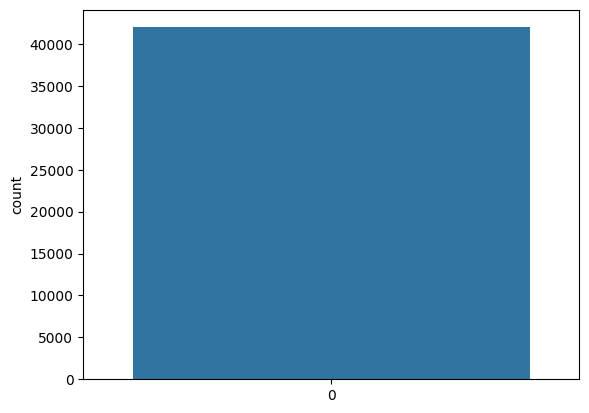

In [9]:
sns.countplot(train['label'])

In [10]:
#loading the dataset.......(Test)
test= pd.read_csv("/content/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')

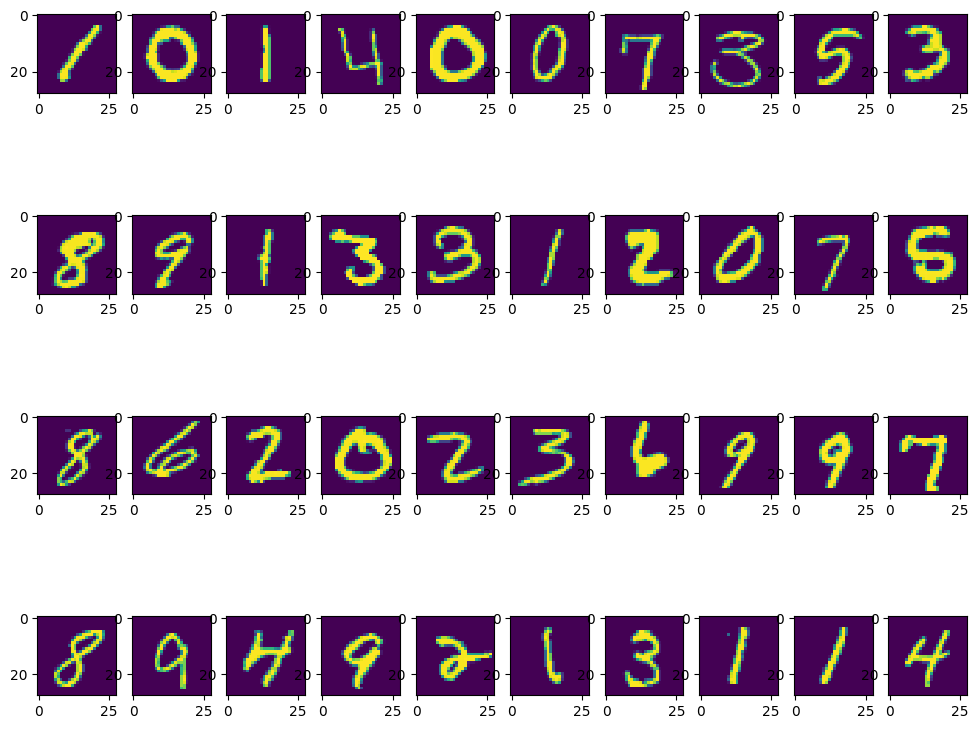

In [14]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [17]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 784)
42000 train samples
28000 test samples


In [18]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

In [21]:
# convert class vectors to binary class matrices One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

**Model building**

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        

**Modelling, training & testing**

In [24]:
datagen.fit(X_train)
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/20


<ipython-input-24-cdddc4cc2d8b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


590/590 [==============================] - ETA: 0s - loss: 0.3492 - accuracy: 0.8886

590/590 [==============================] - 170s 284ms/step - loss: 0.3492 - accuracy: 0.8886 - val_loss: 0.0474 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 2/20
590/590 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9662

590/590 [==============================] - 173s 294ms/step - loss: 0.1098 - accuracy: 0.9662 - val_loss: 0.0338 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 3/20
590/590 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9733

590/590 [==============================] - 167s 282ms/step - loss: 0.0860 - accuracy: 0.9733 - val_loss: 0.0269 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 4/20
590/590 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9777

590/590 [==============================] - 160s 271ms/step - loss: 0.0741 - accuracy: 0.9777 - val_loss: 0.0297 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 5/20
590/590 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9803

590/590 [==============================] - 158s 269ms/step - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.0371 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 6/20
590/590 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9827

590/590 [==============================] - 158s 268ms/step - loss: 0.0589 - accuracy: 0.9827 - val_loss: 0.0273 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 7/20
590/590 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9836

590/590 [==============================] - 158s 268ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0233 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 8/20
590/590 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9847

590/590 [==============================] - 159s 270ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0243 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 9/20
590/590 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9861

590/590 [==============================] - 158s 267ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0189 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 10/20
590/590 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9860

590/590 [==============================] - 160s 271ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0243 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 11/20
590/590 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9866

590/590 [==============================] - 158s 268ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0201 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 12/20
590/590 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9883

590/590 [==============================] - 162s 274ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0174 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 13/20
590/590 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9878

590/590 [==============================] - 161s 273ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0266 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 14/20
590/590 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9881

590/590 [==============================] - 162s 274ms/step - loss: 0.0403 - accuracy: 0.9881 - val_loss: 0.0225 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 15/20
590/590 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9886

590/590 [==============================] - 161s 273ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0182 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 16/20
590/590 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9890

590/590 [==============================] - 162s 275ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0247 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 17/20
590/590 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9897

590/590 [==============================] - 162s 274ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0212 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 18/20
590/590 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9898

590/590 [==============================] - 159s 269ms/step - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0239 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 19/20
590/590 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9898

590/590 [==============================] - 162s 274ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0194 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 20/20
590/590 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9904

590/590 [==============================] - 162s 274ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0187 - val_accuracy: 0.9950 - lr: 0.0010


**Model Evaluation: **

*Loss & Accuracy of model on MNIST digit classification *

In [25]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.018696, final accuracy: 0.995000


**plot_confusion_matrix**

132/132 [==============================] - 9s 67ms/step


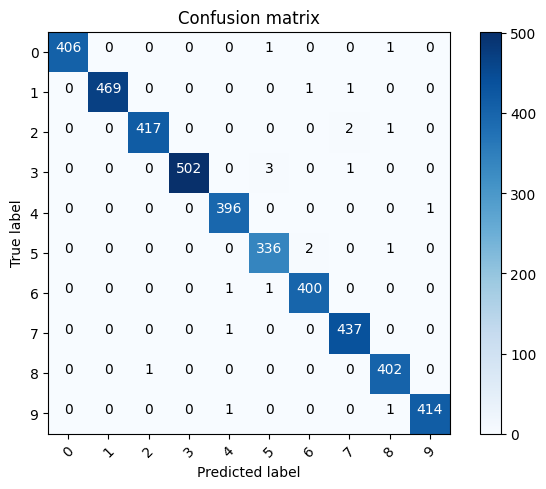

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [31]:
for key in h.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy
lr


**Accuracy & loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


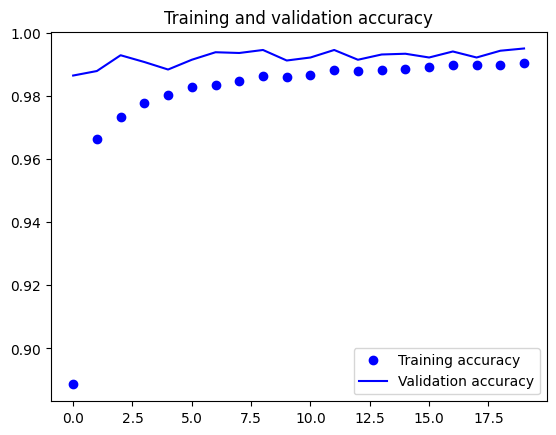

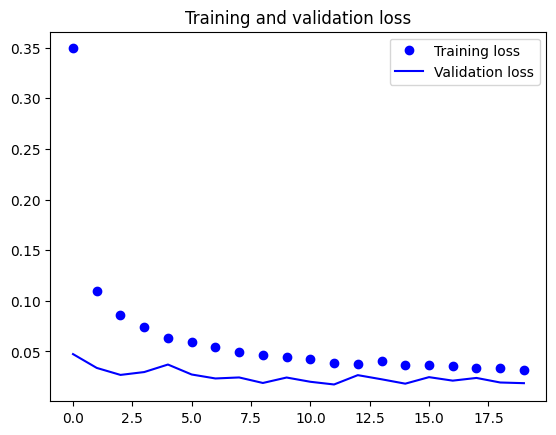

In [32]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**top most errors**

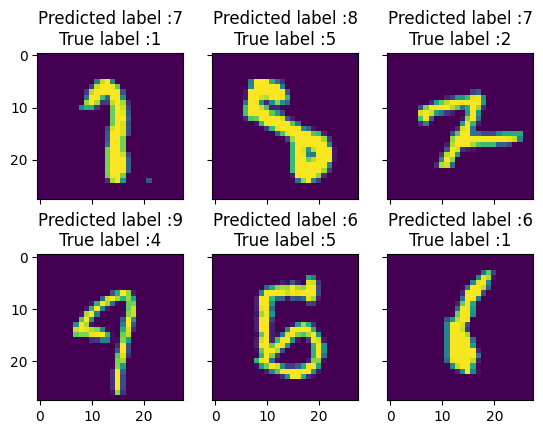

In [33]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
 # Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)           

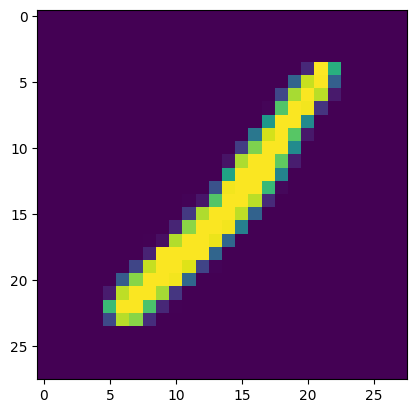

In [34]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')

1/1 [==============================] - 0s 86ms/step


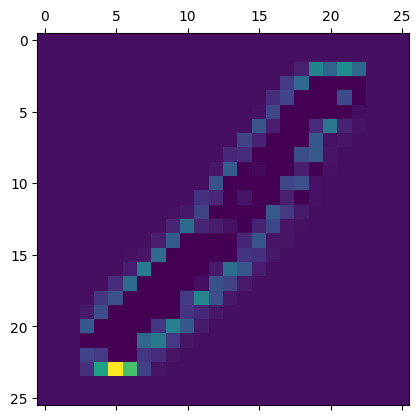

In [41]:
 
from keras import models

from keras import Sequential
from keras import layers 
from keras import Model 
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [42]:
model.layers[:-1]# Droping The Last Dense Layer

<ipython-input-43-6522078ac1f4>:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


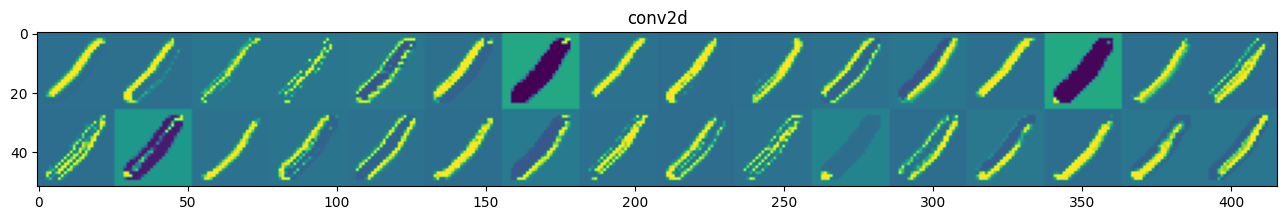

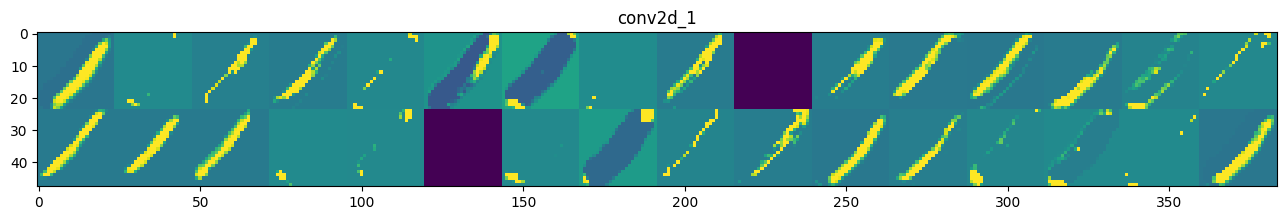

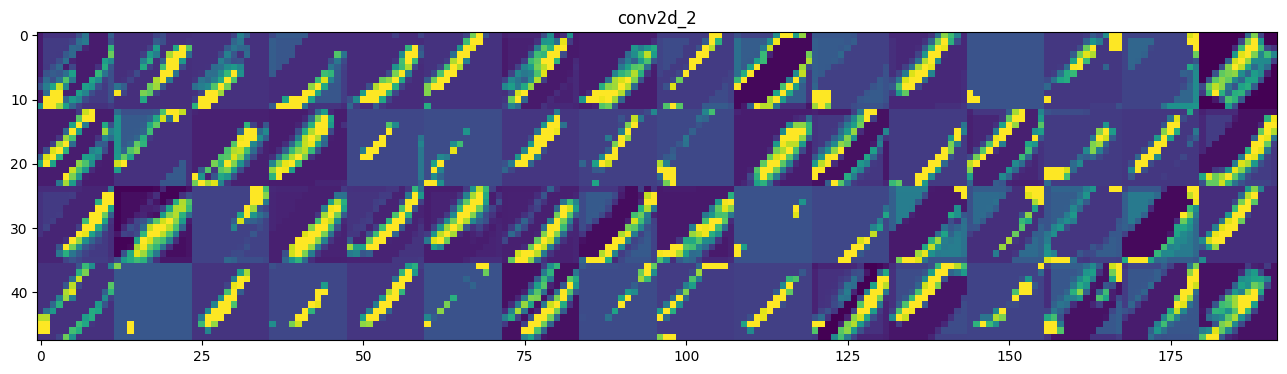

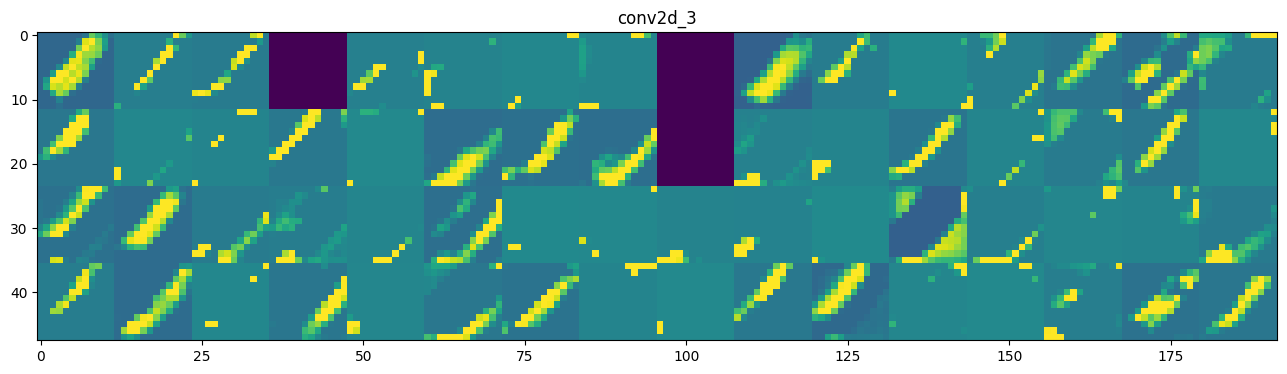

In [43]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

<ipython-input-44-c7a411bcd59c>:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


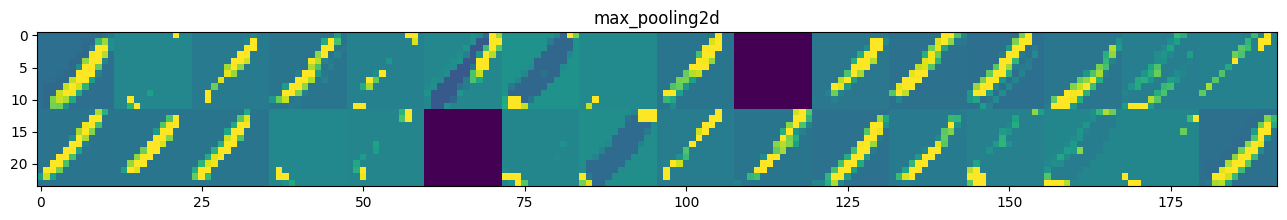

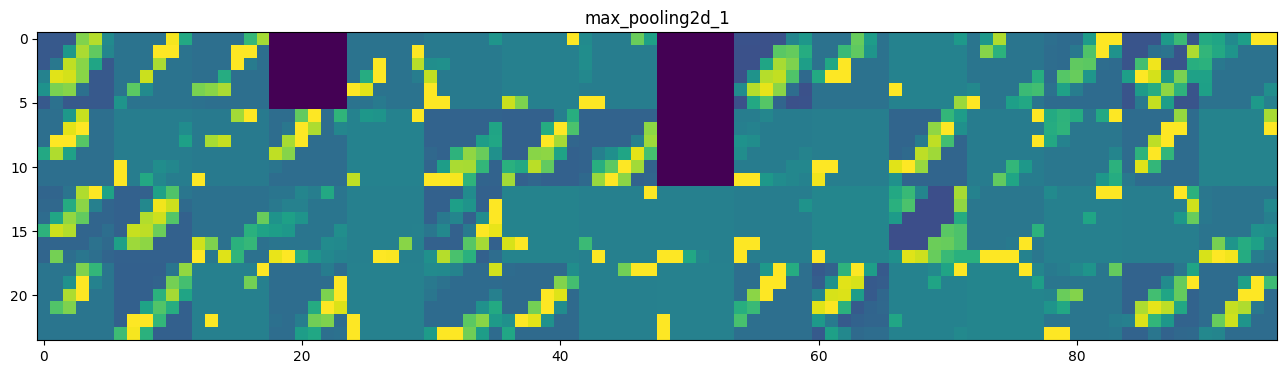

In [44]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

<ipython-input-45-01217a04150e>:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


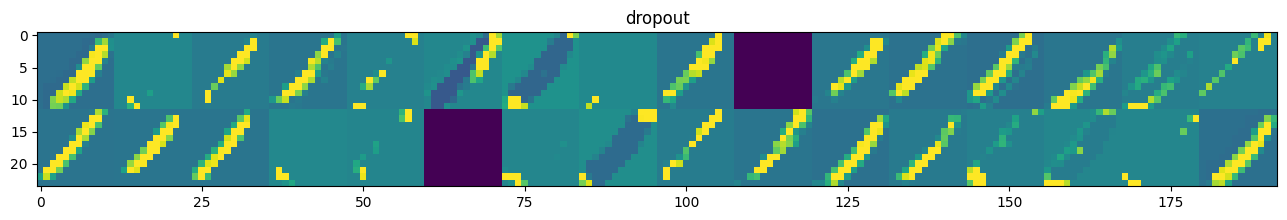

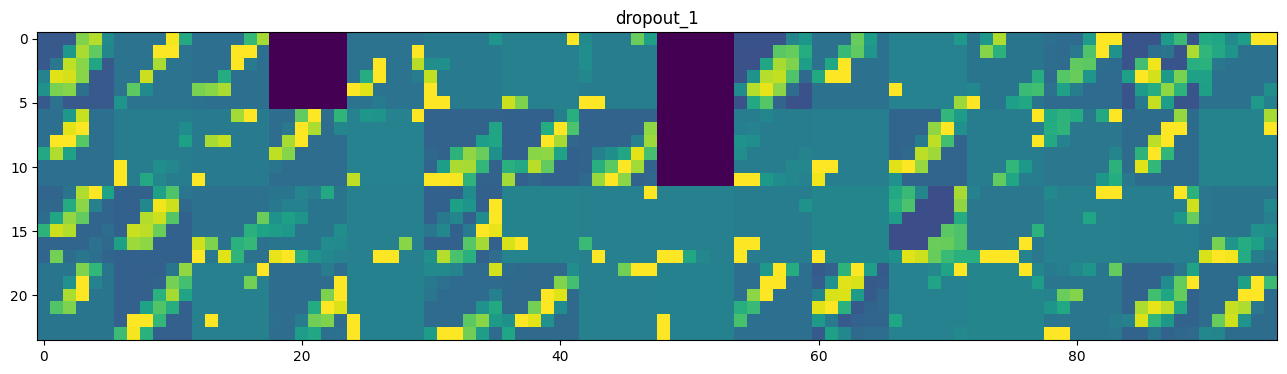

In [45]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('drop'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

**classification report **

In [46]:
#classification report
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_val, axis = 1)

132/132 [==============================] - 5s 36ms/step


In [47]:
Y_pred_classes[:5], Y_true_classes[:5]

(array([8, 1, 9, 9, 8]), array([8, 1, 9, 9, 8]))

In [48]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       408
     Class 1       1.00      1.00      1.00       471
     Class 2       1.00      0.99      1.00       420
     Class 3       1.00      0.99      1.00       506
     Class 4       0.99      1.00      0.99       397
     Class 5       0.99      0.99      0.99       339
     Class 6       0.99      1.00      0.99       402
     Class 7       0.99      1.00      0.99       438
     Class 8       0.99      1.00      0.99       403
     Class 9       1.00      1.00      1.00       416

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       1.00      0.99      1.00      4200



In [50]:
#predicted_classes = model.predict_classes(X_test)
predicted_classes=np.argmax(model.predict(X_test),axis=1)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("asd.csv", index=False, header=True)

875/875 [==============================] - 31s 35ms/step


In [52]:
submission=pd.read_csv("/content/asd.csv")
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [53]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [51]:
model.save('my_model_1.h5')
json_string = model.to_json()

**EVALUATION OF MODEL:**

*Final loss*: 0.018696

*final accuracy:* 0.995000

*Precision*:

  class labels-[0,1,2,3,9] is 100%

*Recall*:

 class labels-[0,1,4,6,7,8,9] is 100%

*F-1 score:*

 class labels-[0,1,2,3,9] is 100%

**ANALYSIS:**

Final accuracy obtained is 99.5% as  model improved  during training from 88%. 

Class label 3 the most correctly predicted(less misclassifications) class of all the other classes 

while

 class label 5 is the least correctly predicted(more misclassifications) compared to all the other classes. 

Test dataset(28000 samples)  accuracy(above 99%) fared better than train dataset(42000 samples)  accuracy(above 98%). 

The loss of test dataset  is less than train dataset which is less than 5%. So the final loss  is less than 2% .  

label - 1,24,5 are the most misclassified classes of all.  

Precision, recall and F-1 score of class labels - 0,1,9 are same and obtained as 100 %.

 **So false positive and false negative images for these labels in the dataset has to be provided and trained further using a model and evaluated. **